In [26]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
%matplotlib inline

In [27]:
image_path = '/home/justbj/Pictures/IMG-20171222-WA0016.jpg'

In [28]:
image = Image.open(image_path)

In [29]:
image.load()
image_data = np.asarray(image,dtype='int32')
image_data.shape

(1280, 1280, 3)

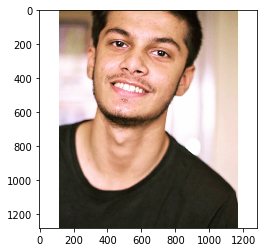

In [30]:
plt.imshow(image_data)

In [31]:
data = image_data/255.0
data = data.reshape((image_data.shape[0])*(image_data.shape[1]),3)
data.shape

(1638400, 3)

In [32]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

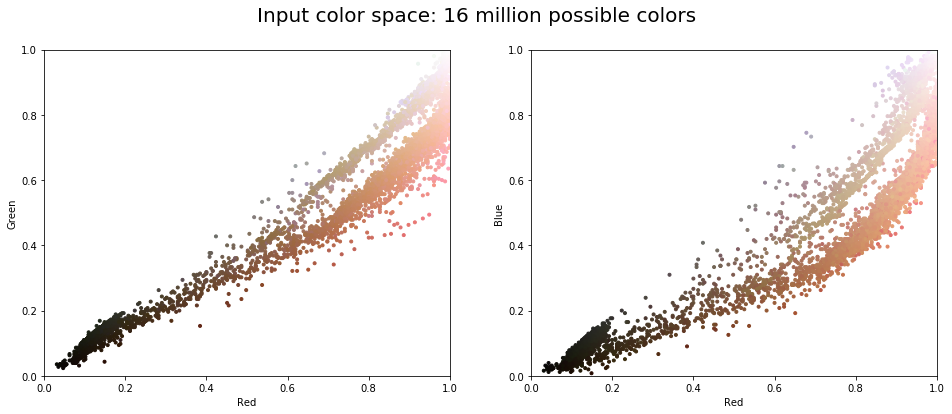

In [33]:
plot_pixels(data, title='Input color space: 16 million possible colors')

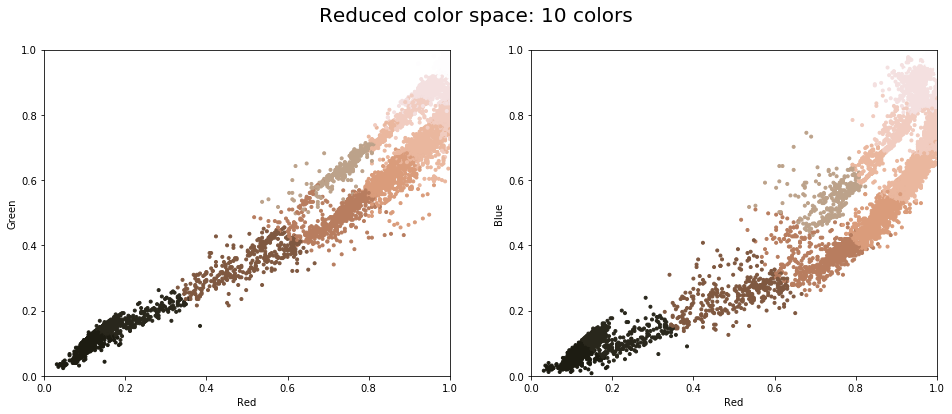

In [45]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(10)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 10 colors")

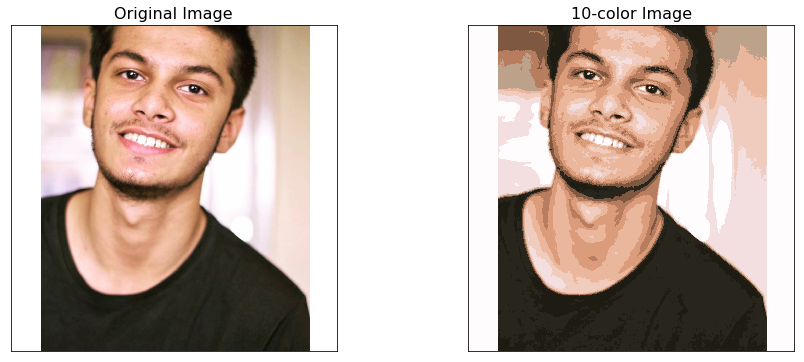

In [46]:
image_recolored = new_colors.reshape(image_data.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(image_data)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(image_recolored)
ax[1].set_title('10-color Image', size=16);

In [40]:
image_recolored.shape

(1280, 1280, 3)